In [1]:
import os
import pandas as pd
import seaborn as sns
import mysql.connector
from sqlalchemy import create_engine
from sqlalchemy import (Column, DateTime, Integer, Numeric, Float, String, Text)

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.mstats import gmean

In [2]:
np.__version__

'1.12.1'

In [3]:
immport_user = os.getenv("IMMPORT_USER","USER")
immport_password = os.getenv("IMMPORT_PASSWORD","PASSWORD")
immport_database = os.getenv("IMMPORT_DATABASE","DR26")
immport_host = os.getenv("IMMPORT_HOST","127.0.0.1")

In [4]:
conn1 = f"mysql+mysqlconnector://{immport_user}:{immport_password}@{immport_host}:3306/{immport_database}"
immportConn = create_engine(conn1, connect_args={'connect_timeout': 120 }, echo=False)


In [13]:
sql = f'''
SELECT va.subject_accession, va.study_accession, va.study_time_collected,  va.value_preferred, va.virus_strain_preferred
FROM vaccine_analysis va
ORDER BY va.subject_accession, va.study_accession, va.virus_strain_preferred, va.study_time_collected
'''

hai_result = pd.read_sql(sql, immportConn)
hai_result

# print(hai_result['virus_strain_preferred'], hai_result['subject_accession'])


,subject_accession,study_accession,study_time_collected,value_preferred,virus_strain_preferred
0,SUB112832,SDY269,0.0,20.0,A/Brisbane/59/2007
1,SUB112832,SDY269,28.0,20.0,A/Brisbane/59/2007
2,SUB112832,SDY269,0.0,5.0,A/Uruguay/716/2007
3,SUB112832,SDY269,28.0,5.0,A/Uruguay/716/2007
4,SUB112832,SDY269,0.0,5.0,B/Brisbane/03/2007
5,SUB112832,SDY269,28.0,5.0,B/Brisbane/03/2007
6,SUB112832,SDY61,0.0,40.0,A/Solomon Islands/3/2006
7,SUB112832,SDY61,28.0,640.0,A/Solomon Islands/3/2006
8,SUB112832,SDY61,0.0,5.0,A/Wisconsin/67/2005
9,SUB112832,SDY61,28.0,160.0,A/Wisconsin/67/2005


In [8]:
hai_result['study_accession'].unique()

array(['SDY269', 'SDY61', 'SDY112', 'SDY311', 'SDY312', 'SDY315', 'SDY478',
       'SDY113', 'SDY305', 'SDY472', 'SDY198', 'SDY200', 'SDY196',
       'SDY197', 'SDY199', 'SDY201', 'SDY296', 'SDY301', 'SDY212',
       'SDY314', 'SDY369', 'SDY372', 'SDY376', 'SDY645', 'SDY406', 'SDY515'], dtype=object)

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

In [ ]:
example = hai_result[hai_result['value_preferred'] < 50 ]

In [ ]:
example

In [ ]:
studies = sorted(hai_result['study_accession'].unique())
plt.figure();
hai_result['study_time_collected'].plot.hist(title='study accession histogram', rot = 0)
plt.show();
plt.close()

In [ ]:
print((sorted(hai_result['study_accession'].unique())) )
print(len(sorted(hai_result['subject_accession'].unique())) )
print(len(sorted(hai_result['study_time_collected'].unique())) )

In [ ]:
studies = sorted(hai_result['study_accession'].unique())

plt.figure();
histo = hai_result['value_preferred'].plot.hist(title='value_preferred')
plt.show();
plt.close()

In [ ]:
soi = hai_result.loc[hai_result['study_accession']== 'SDY404']
plt.figure();
histo = soi['value_preferred'].plot.hist(title='value_preferred')
plt.show();
plt.close()

In [ ]:
plt.hist(hai_result['value_preferred'], normed = True)
plt.show()
plt.close()


In [ ]:
%%time
studies = sorted(hai_result['study_accession'].unique())
day0 = pd.DataFrame(index=hai_result.index, columns=hai_result.columns)
for study in studies:
#     print('\t\t===========', study, '===========')
    df = hai_result.loc[hai_result['study_accession'] == study]
    subjects = sorted(df['subject_accession'].unique())
    for subject in subjects:
        
        sub_data = df[df['subject_accession']==subject]
        strains = sorted(sub_data['virus_strain_preferred'].unique().astype(str))
#         print('\t\t----------', subject, '----------')
        for strain in strains:
            if strain != 'None':
                data = sub_data[sub_data['virus_strain_preferred']==strain]
                hold = data[data['study_time_collected']==0]
                
                # print(day0)


In [ ]:
day0 = hai_result.loc[hai_result['virus_strain_preferred'] == 0]

In [17]:
strains = sorted(hai_result['virus_strain_preferred'].unique().astype(str))
strains

['A/Brisbane/10/2007',
 'A/Brisbane/59/2007',
 'A/California/7/2009',
 'A/Perth/16/2009',
 'A/Solomon Islands/3/2006',
 'A/South Dakota/06/2007',
 'A/Texas/50/2012',
 'A/Uruguay/716/2007',
 'A/Victoria/3/1975',
 'A/Victoria/361/2011',
 'A/Wisconsin/67/2005',
 'B/Brisbane/03/2007',
 'B/Brisbane/60/2008',
 'B/Florida/4/2006',
 'B/Lee/1940',
 'B/Malaysia/2506/2004',
 'B/Massachusetts/02/2012',
 'B/Wisconsin/01/2010',
 'None']

-------------------------- A/Brisbane/10/2007 --------------------------


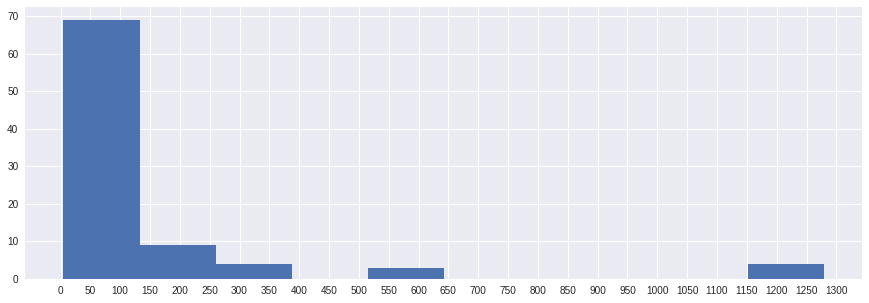

bins:  [    5.    132.5   260.    387.5   515.    642.5   770.    897.5  1025.
  1152.5  1280. ]
n:  [ 69.   9.   4.   0.   3.   0.   0.   0.   0.   4.]
-------------------------- A/Brisbane/59/2007 --------------------------


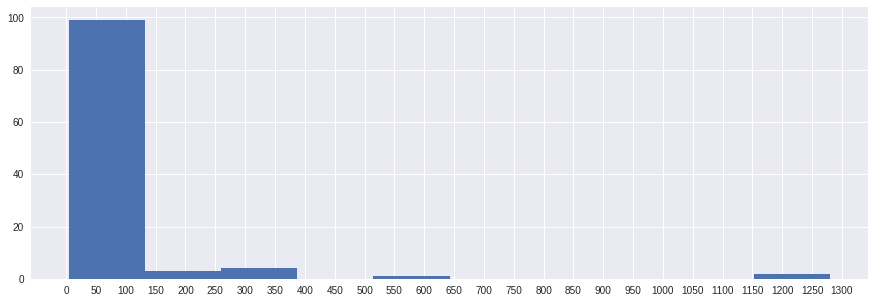

bins:  [    5.    132.5   260.    387.5   515.    642.5   770.    897.5  1025.
  1152.5  1280. ]
n:  [ 99.   3.   4.   0.   1.   0.   0.   0.   0.   2.]
-------------------------- A/California/7/2009 --------------------------


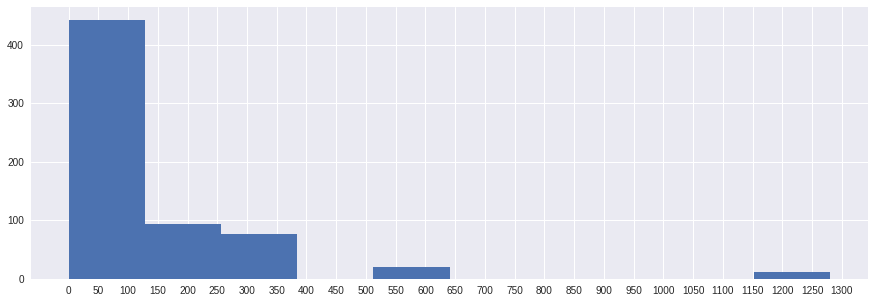

bins:  [  1.00000000e+00   1.28900000e+02   2.56800000e+02   3.84700000e+02
   5.12600000e+02   6.40500000e+02   7.68400000e+02   8.96300000e+02
   1.02420000e+03   1.15210000e+03   1.28000000e+03]
n:  [ 442.   93.   77.    0.   20.    0.    0.    0.    0.   11.]
-------------------------- A/Perth/16/2009 --------------------------


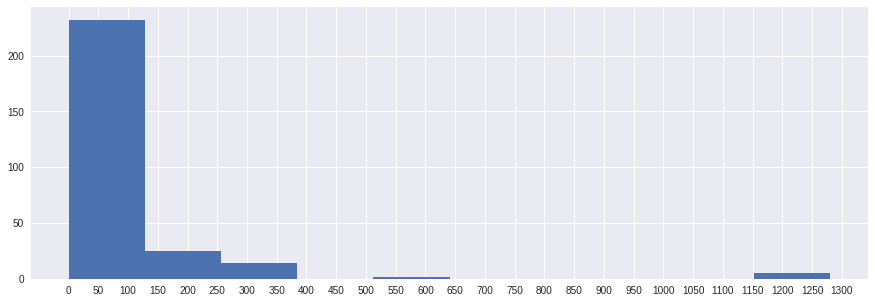

bins:  [  1.00000000e+00   1.28900000e+02   2.56800000e+02   3.84700000e+02
   5.12600000e+02   6.40500000e+02   7.68400000e+02   8.96300000e+02
   1.02420000e+03   1.15210000e+03   1.28000000e+03]
n:  [ 232.   25.   14.    0.    2.    0.    0.    0.    0.    5.]
-------------------------- A/Solomon Islands/3/2006 --------------------------


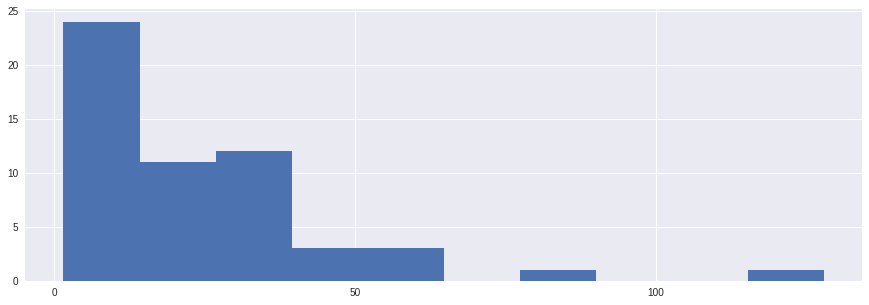

bins:  [   1.5    14.15   26.8    39.45   52.1    64.75   77.4    90.05  102.7
  115.35  128.  ]
n:  [ 24.  11.  12.   3.   3.   0.   1.   0.   0.   1.]
-------------------------- A/South Dakota/06/2007 --------------------------


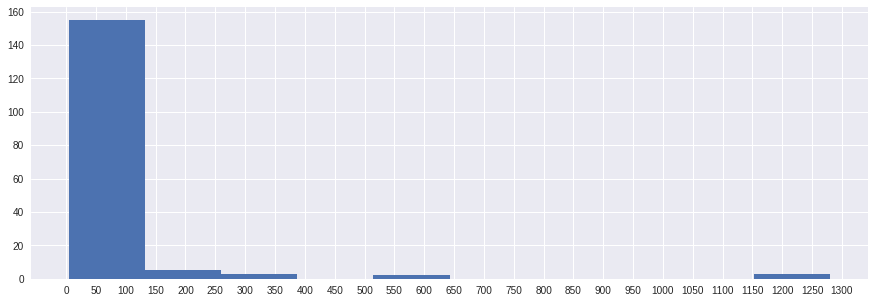

bins:  [    5.    132.5   260.    387.5   515.    642.5   770.    897.5  1025.
  1152.5  1280. ]
n:  [ 155.    5.    3.    0.    2.    0.    0.    0.    0.    3.]
-------------------------- A/Texas/50/2012 --------------------------


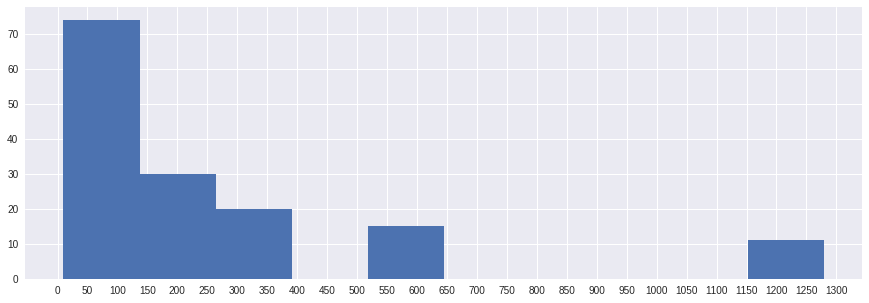

bins:  [   10.   137.   264.   391.   518.   645.   772.   899.  1026.  1153.
  1280.]
n:  [ 74.  30.  20.   0.  15.   0.   0.   0.   0.  11.]
-------------------------- A/Uruguay/716/2007 --------------------------


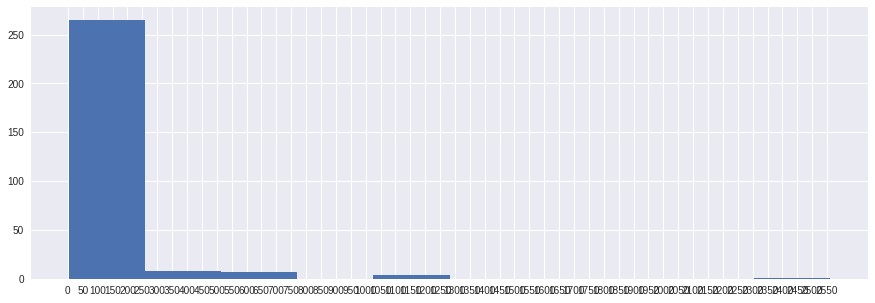

bins:  [    4.    259.6   515.2   770.8  1026.4  1282.   1537.6  1793.2  2048.8
  2304.4  2560. ]
n:  [ 265.    8.    7.    0.    4.    0.    0.    0.    0.    1.]
-------------------------- A/Victoria/3/1975 --------------------------


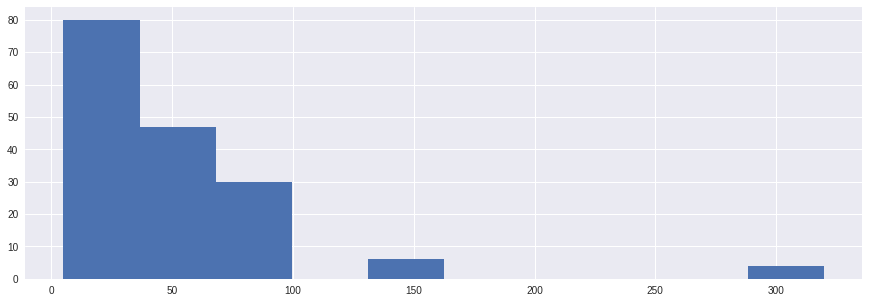

bins:  [   5.    36.5   68.    99.5  131.   162.5  194.   225.5  257.   288.5
  320. ]
n:  [ 80.  47.  30.   0.   6.   0.   0.   0.   0.   4.]
-------------------------- A/Victoria/361/2011 --------------------------


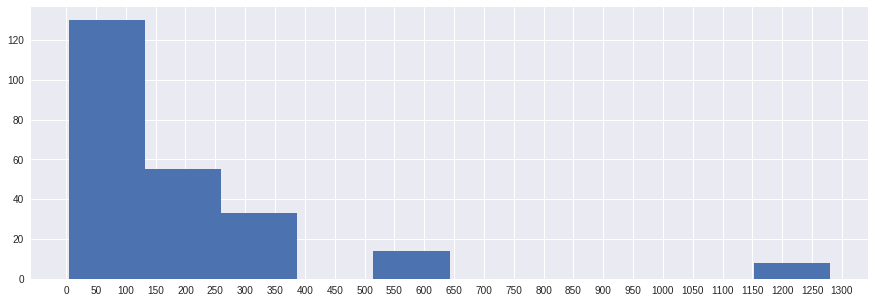

bins:  [    5.    132.5   260.    387.5   515.    642.5   770.    897.5  1025.
  1152.5  1280. ]
n:  [ 130.   55.   33.    0.   14.    0.    0.    0.    0.    8.]
-------------------------- A/Wisconsin/67/2005 --------------------------


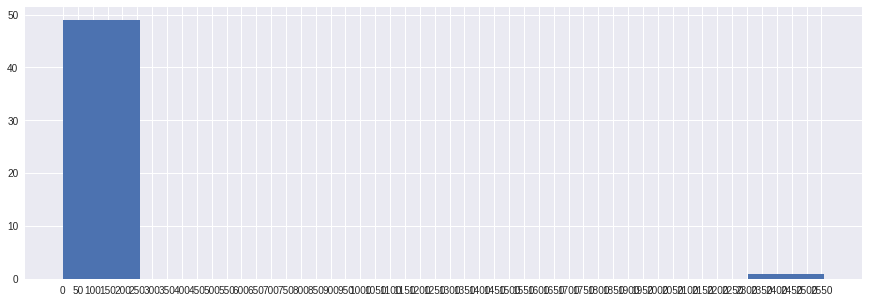

bins:  [  2.00000000e+00   2.57800000e+02   5.13600000e+02   7.69400000e+02
   1.02520000e+03   1.28100000e+03   1.53680000e+03   1.79260000e+03
   2.04840000e+03   2.30420000e+03   2.56000000e+03]
n:  [ 49.   0.   0.   0.   0.   0.   0.   0.   0.   1.]
-------------------------- B/Brisbane/03/2007 --------------------------


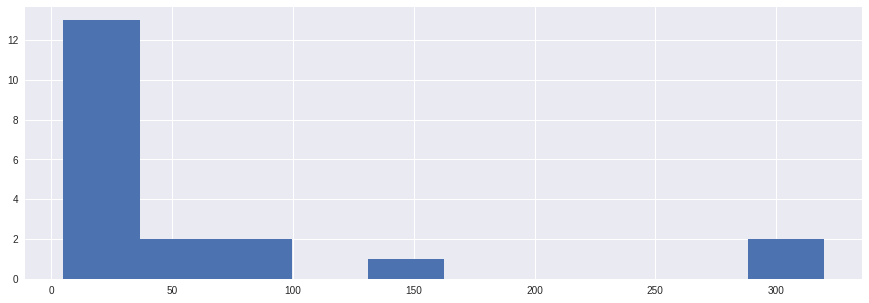

bins:  [   5.    36.5   68.    99.5  131.   162.5  194.   225.5  257.   288.5
  320. ]
n:  [ 13.   2.   2.   0.   1.   0.   0.   0.   0.   2.]
-------------------------- B/Brisbane/60/2008 --------------------------


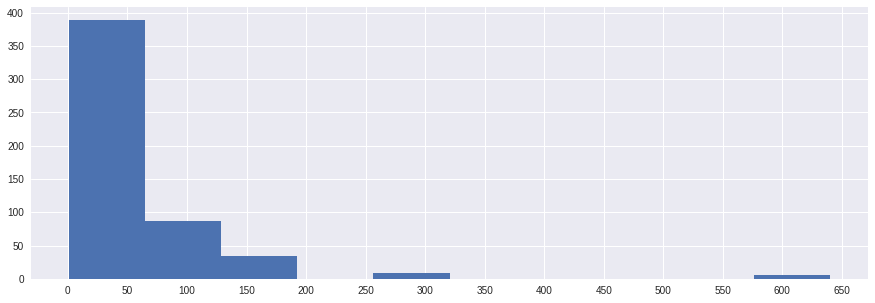

bins:  [   1.    64.9  128.8  192.7  256.6  320.5  384.4  448.3  512.2  576.1
  640. ]
n:  [ 389.   87.   35.    0.    8.    0.    0.    0.    0.    5.]
-------------------------- B/Florida/4/2006 --------------------------


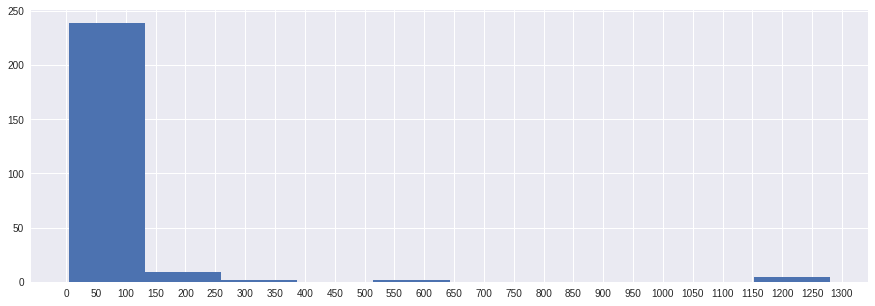

bins:  [    5.    132.5   260.    387.5   515.    642.5   770.    897.5  1025.
  1152.5  1280. ]
n:  [ 239.    9.    2.    0.    2.    0.    0.    0.    0.    4.]
-------------------------- B/Lee/1940 --------------------------


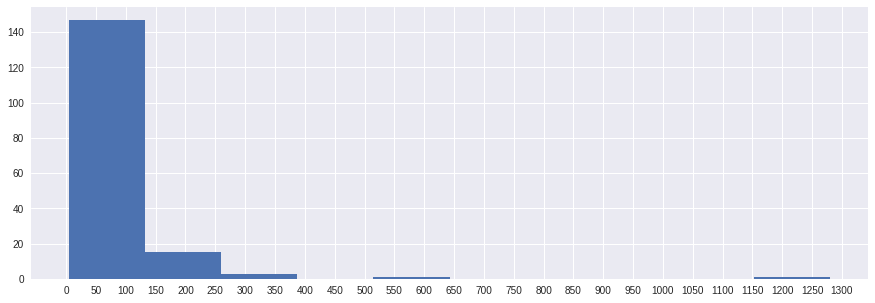

bins:  [    5.    132.5   260.    387.5   515.    642.5   770.    897.5  1025.
  1152.5  1280. ]
n:  [ 147.   15.    3.    0.    1.    0.    0.    0.    0.    1.]
-------------------------- B/Malaysia/2506/2004 --------------------------


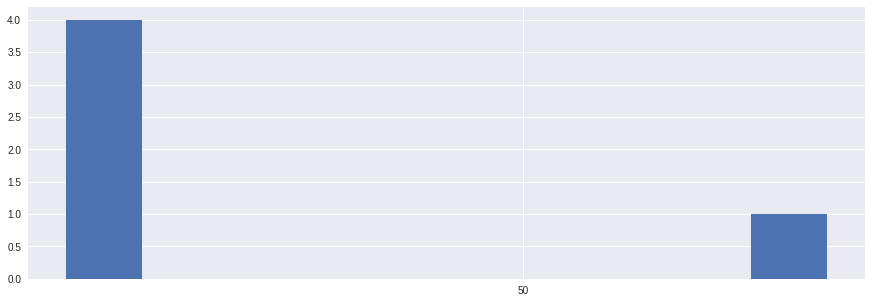

bins:  [  5.   12.5  20.   27.5  35.   42.5  50.   57.5  65.   72.5  80. ]
n:  [ 4.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
-------------------------- B/Massachusetts/02/2012 --------------------------


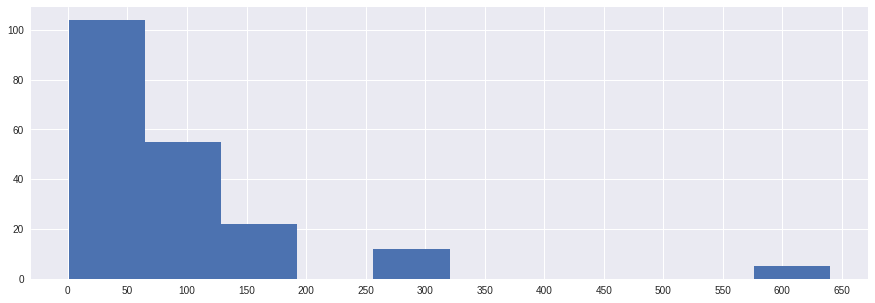

bins:  [   1.    64.9  128.8  192.7  256.6  320.5  384.4  448.3  512.2  576.1
  640. ]
n:  [ 104.   55.   22.    0.   12.    0.    0.    0.    0.    5.]
-------------------------- B/Wisconsin/01/2010 --------------------------


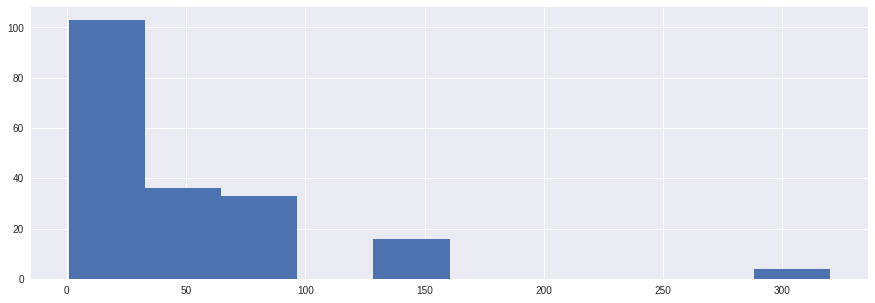

bins:  [   1.    32.9   64.8   96.7  128.6  160.5  192.4  224.3  256.2  288.1
  320. ]
n:  [ 103.   36.   33.    0.   16.    0.    0.    0.    0.    4.]
-------------------------- None --------------------------


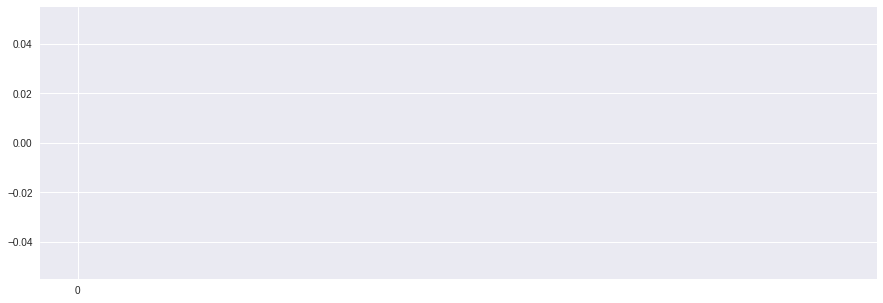

bins:  [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
n:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [42]:
for strain in strains:
    
    data = hai_result[hai_result['virus_strain_preferred']==strain]
    day0 = data[data['study_time_collected'] == 0]
    plt.figure(figsize=(15,5));
    plt.xticks(np.arange(0, max(hai_result['value_preferred']), step=50) )
    
    n, bins, patches = plt.hist(day0['value_preferred'])
    print('--------------------------', strain, '--------------------------')
    plt.show();
    plt.close()
    print('bins: ', bins)
    print('n: ', n)


%%time

studies = sorted(hai_result['study_accession'].unique())
for study in studies:
    print('\t\t===========', study, '===========')
    df = hai_result.loc[hai_result['study_accession'] == study]
    subjects = sorted(df['subject_accession'].unique())
    for subject in subjects:
        
        sub_data = df[df['subject_accession']==subject]
        strains = sorted(sub_data['virus_strain_preferred'].unique().astype(str))
        print('\t\t----------', subject, '----------')
        for strain in strains:
            if strain != 'None':
                data = sub_data[sub_data['virus_strain_preferred']==strain]
                data.plot.scatter(x='study_time_collected',y='value_preferred', c= 'DarkBlue', title =strain)
                plt.show();
                plt.close()
        print('--------------------------------------------------------')



%%time
use this one for inspiration
studies = sorted(hai_result['study_accession'].unique())
for study in studies:
    print('\t\t===========', study, '===========')
    df = hai_result.loc[hai_result['study_accession'] == study]
    subjects = sorted(df['subject_accession'].unique())
    for subject in subjects:
        
        sub_data = df[df['subject_accession']==subject]
        strains = sorted(sub_data['virus_strain_preferred'].unique().astype(str))
        print('\t\t----------', subject, '----------')
        for strain in strains:
            if strain != 'None':
                data = sub_data[sub_data['virus_strain_preferred']==strain]
                data.plot.scatter(x='study_time_collected',y='value_preferred', c= 'DarkBlue', title =strain)
                plt.show();
                plt.close()
        print('--------------------------------------------------------')

'''
temp = pd
for i in hai_result:
    iterate thru hai result
    check if the day is 0 
        if so change the list of values
        if not, add the values to the list
    get geometric mean of the list 
    add that to the studies page
    litlit
'''
studies = sorted(hai_result['study_accession'].unique())
means = []

for study in studies:
    print('\t\t===========', study, '===========')
    df = hai_result.loc[hai_result['study_accession'] == study]
    subjects = sorted(df['subject_accession'].unique())
    for subject in subjects:
#         print(subject['study_accession'])
        temp = df[df['subject_accession']]